In [1]:
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import cmasher as cmr

In [2]:
f = open("../run/carma/bd_diamondback.txt")
NZ, NGROUP, NELEM, NBIN, NGAS, nstep, iskip = np.array(f.readline().split(), dtype=int)

r = np.zeros(NBIN)
rmass = np.zeros((NBIN, NGROUP))

for i in range(NGROUP):
    for j in range(NBIN):
        _, _, r[j], rmass[j, i], _, _, _ = np.array(f.readline().split(), dtype=float)


kzz = np.zeros(NZ)
P = np.zeros(NZ)
T = np.zeros(NZ)
Z = np.zeros(NZ)

for i in range(NZ):
    _, Z[i], _, P[i], T[i], kzz[i] = np.array(f.readline().split(), dtype=float)


f.readline()
for j in range(NBIN):
    for i in range(NZ):
        f.readline()


NT = int(nstep/iskip)

numden = np.zeros((NZ, 18, NBIN, NT))

for i in range(NT):
    t_step = f.readline()
    if t_step:
        # print(t_step)
        for j in range(NBIN):
            for k in range(NZ):
                line = np.array(f.readline().split(), dtype=float)
                (_, _, numden[k, 1, j, i], 
                numden[k, 2, j, i], 
                numden[k, 4, j, i], 
                numden[k, 6, j, i], 
                numden[k, 8, j, i], 
                numden[k, 10, j, i], 
                numden[k, 12, j, i], 
                numden[k, 14, j, i],
                numden[k, 15, j, i],
                numden[k, 16, j, i],
                numden[k, 17, j, i],
                _, _, _, _, _, _, _, _, _, _,
                _, _, _, _, _, _, _, _, _) = line
    else:
        break


f.close()

In [4]:
element_to_group = {
    1:  1,
    2:  2,
    3:  2,
    4:  3,
    5:  3,
    6:  4,
    7:  4,
    8:  5,
    9:  5,
    10: 6,
    11: 6,
    12: 7,
    13: 7,
    14: 8,
    15: 9,
    16: 10,
    17: 11,
    18: 11    
}

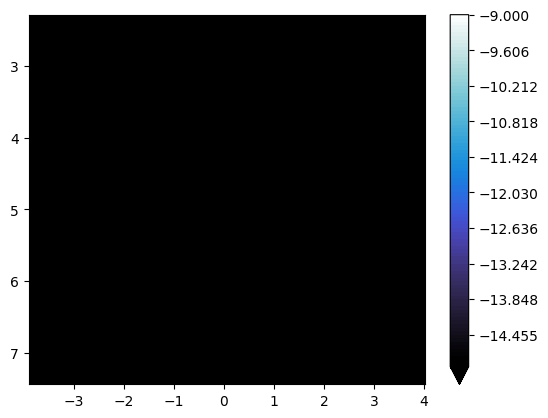

In [27]:

iele = 17

plt.contourf(np.log10(numden[:, iele, :, 1100]*rmass[:, element_to_group[iele]-1]+1e-50), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])),  levels=np.linspace(-15, -9, 100), cmap="cmr.freeze", extend="min")
# plt.contour(numden[:, igroup, :, 30]*rmass[:, element_to_group[igroup]-1], extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=3, colors="white")
# plt.contourf(np.log10(numden[:, iele, :, -10]), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=100, cmap="magma", extend="min")

# plt.clim(-18, -9)

plt.colorbar()
plt.gca().invert_yaxis()

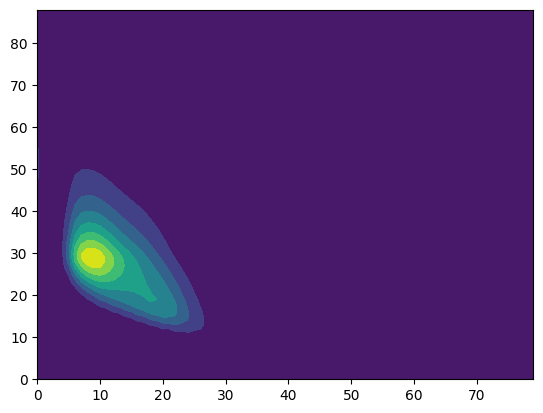

In [83]:
plt.contourf(numden[:, iele, :, 13])

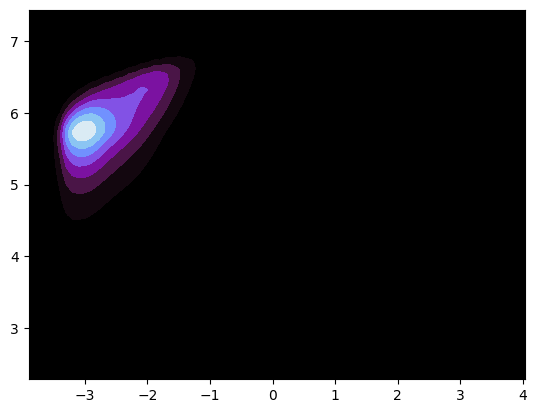

In [86]:
plt.contourf((numden[:, iele, :, 13]+1e-50), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), cmap="cmr.voltage", extend="min")


/home/wcukier/ipykernel_3359484/2157067964.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(np.log10(numden[:, iele, :, -10]), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=100, cmap="magma", extend="min")


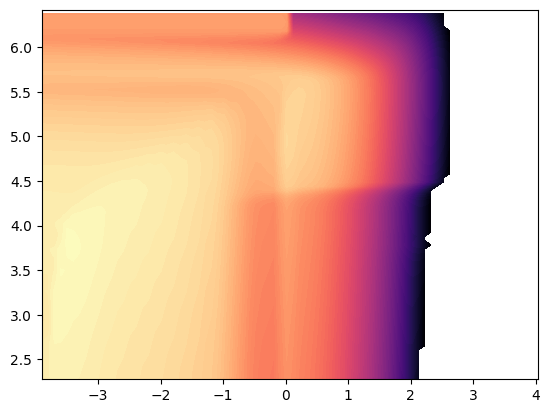

In [57]:
plt.contourf(np.log10(numden[:, iele, :, -10]), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=100, cmap="magma", extend="min")


In [36]:
rmass[:, 1]

array([3.3427e-23, 6.6853e-23, 1.3371e-22, 2.6741e-22, 5.3482e-22,
       1.0696e-21, 2.1393e-21, 4.2786e-21, 8.5572e-21, 1.7114e-20,
       3.4229e-20, 6.8458e-20, 1.3692e-19, 2.7383e-19, 5.4766e-19,
       1.0953e-18, 2.1906e-18, 4.3813e-18, 8.7626e-18, 1.7525e-17,
       3.5050e-17, 7.0101e-17, 1.4020e-16, 2.8040e-16, 5.6080e-16,
       1.1216e-15, 2.2432e-15, 4.4864e-15, 8.9729e-15, 1.7946e-14,
       3.5891e-14, 7.1783e-14, 1.4357e-13, 2.8713e-13, 5.7426e-13,
       1.1485e-12, 2.2971e-12, 4.5941e-12, 9.1882e-12, 1.8376e-11,
       3.6753e-11, 7.3506e-11, 1.4701e-10, 2.9402e-10, 5.8805e-10,
       1.1761e-09, 2.3522e-09, 4.7044e-09, 9.4087e-09, 1.8817e-08,
       3.7635e-08, 7.5270e-08, 1.5054e-07, 3.0108e-07, 6.0216e-07,
       1.2043e-06, 2.4086e-06, 4.8173e-06, 9.6345e-06, 1.9269e-05,
       3.8538e-05, 7.7076e-05, 1.5415e-04, 3.0831e-04, 6.1661e-04,
       1.2332e-03, 2.4664e-03, 4.9329e-03, 9.8658e-03, 1.9732e-02,
       3.9463e-02, 7.8926e-02, 1.5785e-01, 3.1570e-01, 6.3141e

In [12]:
np.shape(Z)

(89,)

In [11]:
P

array([1.7780e+02, 1.9140e+02, 2.0705e+02, 2.2510e+02, 2.4585e+02,
       2.6985e+02, 2.9745e+02, 3.2930e+02, 3.6600e+02, 4.0830e+02,
       4.5710e+02, 5.1330e+02, 5.7810e+02, 6.5280e+02, 7.3890e+02,
       8.3815e+02, 9.5255e+02, 1.0844e+03, 1.2364e+03, 1.4116e+03,
       1.6136e+03, 1.8463e+03, 2.1147e+03, 2.4240e+03, 2.7805e+03,
       3.1914e+03, 3.6651e+03, 4.2111e+03, 4.8405e+03, 5.5659e+03,
       6.4024e+03, 7.3664e+03, 8.4774e+03, 9.7579e+03, 1.1234e+04,
       1.2936e+04, 1.4898e+04, 1.7159e+04, 1.9765e+04, 2.2769e+04,
       2.6232e+04, 3.0224e+04, 3.4825e+04, 4.0128e+04, 4.6241e+04,
       5.3289e+04, 6.1409e+04, 7.0774e+04, 8.1564e+04, 9.4004e+04,
       1.0834e+05, 1.2487e+05, 1.4393e+05, 1.6589e+05, 1.9120e+05,
       2.2038e+05, 2.5402e+05, 2.9279e+05, 3.3748e+05, 3.8899e+05,
       4.4837e+05, 5.1684e+05, 5.9569e+05, 6.8664e+05, 7.9149e+05,
       9.1229e+05, 1.0516e+06, 1.2121e+06, 1.3972e+06, 1.6105e+06,
       1.8564e+06, 2.1398e+06, 2.4665e+06, 2.8431e+06, 3.2772e

In [10]:
T

array([ 761.78,  764.5 ,  767.68,  771.07,  774.45,  777.65,  780.82,
        783.45,  784.95,  786.13,  787.63,  789.41,  790.88,  791.41,
        791.81,  792.75,  794.33,  796.64,  800.25,  804.35,  808.25,
        811.95,  815.6 ,  819.21,  822.78,  826.13,  828.76,  831.19,
        834.03,  837.17,  840.8 ,  845.09,  849.59,  854.2 ,  859.03,
        864.14,  869.  ,  873.8 ,  879.06,  884.99,  891.59,  898.78,
        906.55,  914.9 ,  923.84,  933.37,  943.79,  955.56,  969.  ,
        984.05, 1005.5 , 1030.9 , 1057.2 , 1084.4 , 1112.5 , 1141.4 ,
       1171.2 , 1201.9 , 1233.5 , 1256.3 , 1274.3 , 1287.7 , 1300.6 ,
       1313.8 , 1328.7 , 1345.  , 1363.3 , 1384.8 , 1408.9 , 1436.5 ,
       1470.1 , 1506.8 , 1544.  , 1581.  , 1618.  , 1655.  , 1691.9 ,
       1728.6 , 1765.  , 1801.3 , 1837.5 , 1873.7 , 1909.7 , 1945.8 ,
       1981.8 , 2017.9 , 2054.3 , 2091.1 , 2128.  ])

In [8]:
Z

array([219880., 218660., 217430., 216190., 214940., 213680., 212410.,
       211140., 209860., 208570., 207280., 205990., 204690., 203390.,
       202090., 200780., 199470., 198150., 196820., 195470., 194110.,
       192740., 191360., 189970., 188570., 187150., 185730., 184300.,
       182870., 181420., 179950., 178480., 176990., 175480., 173960.,
       172430., 170870., 169310., 167720., 166120., 164490., 162840.,
       161160., 159460., 157720., 155960., 154160., 152320., 150440.,
       148490., 146480., 144380., 142200., 139930., 137570., 135110.,
       132570., 129920., 127190., 124400., 121550., 118670., 115740.,
       112770., 109750., 106680., 103540., 100330.,  97043.,  93654.,
        90154.,  86534.,  82796.,  78937.,  74955.,  70850.,  66624.,
        62274.,  57800.,  53200.,  48475.,  43622.,  38640.,  33528.,
        28282.,  22901.,  17385.,  11729.,   5933.])